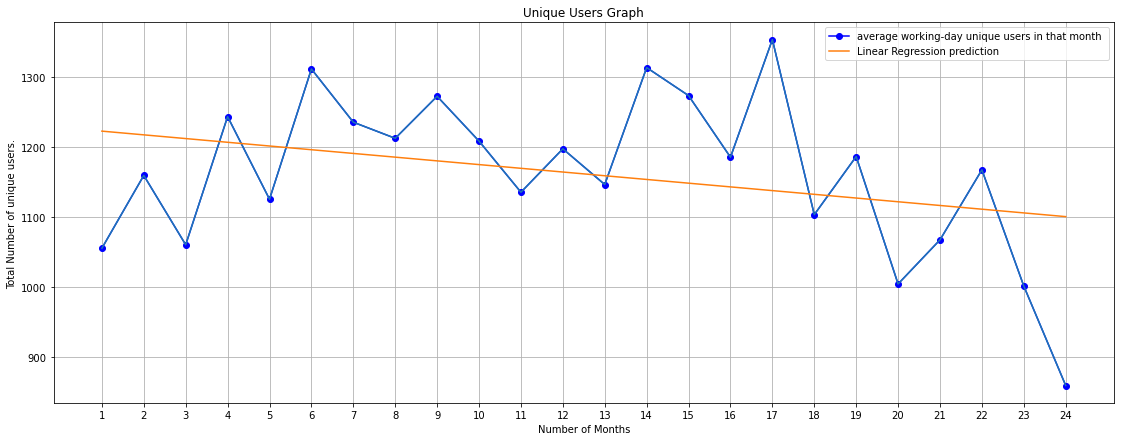

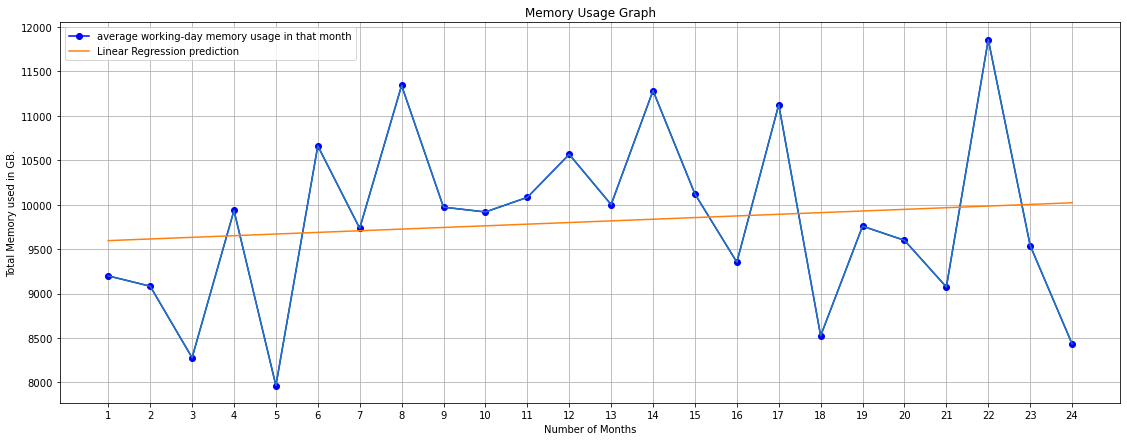

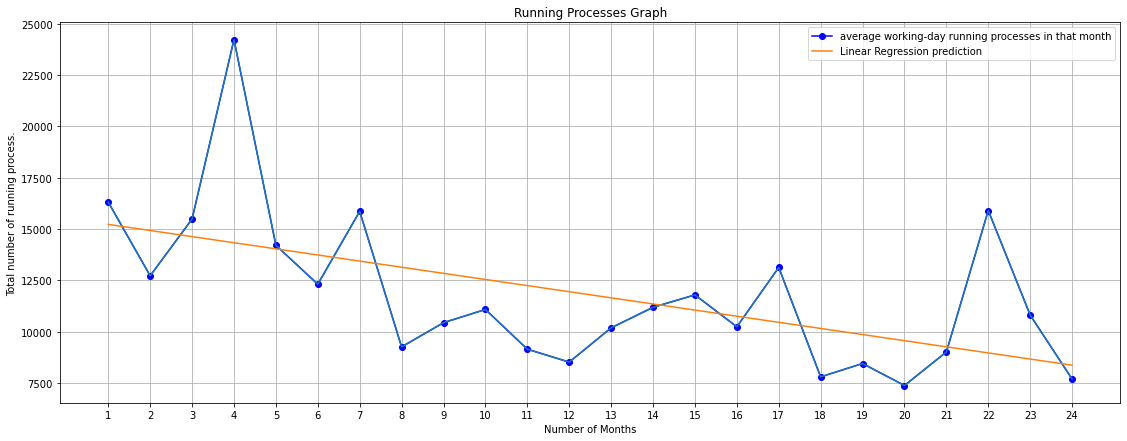

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


file = '../Data/weekends_holidays - weekends_holidays.csv'
df = pd.read_csv(file)
lis = []
# creating the list of holidays according to the csv-file date-hour column format.
for a,b in df.iterrows():
    date = b[0].split('-')
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    date = months[date[1]]+date[0]+'_'+date[2]
    lis.append(date)

csv_path = '../SMC-Data_Challenge/csv_files/'
csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
        'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
        'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
        'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']

def predicting_regression(arg):
    weekday_m= []

    
    for i in csvs:
        # fetching the particular columns needed for the graphical correlation.
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node',arg])
        new_df = df.sort_values(by=['date-hour','login-node'])
    
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        
        wu = []
        
        
        for j in range(1,end+1):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
        
            abc = new_df[new_df['date-hour'].str.contains(date)]
            lh = set(abc['login-node'])
            
            if abc[arg].sum() != 0 and date not in lis: 
                wu.append(abc[arg].sum()//len(lh))
                # appending the average of argument value for a day.
        
        weekday_m.append(sum(wu)//len(wu))
        # appending the average of argument value in a month.
        
        
        
    # number of weeks to be plotted on x-axis.
    x_values = np.array([ i for i in range(1,len(weekday_m)+1)])
    
    # the weekday values. 
    w_values = np.array(weekday_m)
    
    
    
    # stretched the graph to the x-axis and set a default size for adding new graphs.
    plt.rcParams['figure.figsize']=(19,7)
    plt.xlabel('Number of Months')
    
    if arg == 'wusers':
        plt.title('Unique Users Graph')
        plt.ylabel('Total Number of unique users.')
        plt.plot(x_values,w_values,label='average working-day unique users in that month ',color='b',marker='o')
        
        
    elif arg  == 'memory-used':
        plt.title('Memory Usage Graph')
        plt.ylabel('Total Memory used in GB.')
        plt.plot(x_values,w_values,label='average working-day memory usage in that month',color='b',marker='o')
        
        
    elif arg  == 'running-process':
        plt.title('Running Processes Graph')
        plt.ylabel('Total number of running process.')
        plt.plot(x_values,w_values,label='average working-day running processes in that month',color='b',marker='o')
        
    
    
    x_values = np.array([ i for i in range(1,len(weekday_m)+1)]).reshape((-1,1))
    
    model = LinearRegression().fit(x_values, w_values)
    # linear regression predeciton for the values of that month.
    y_pred = model.predict(x_values)
    
    x_values = np.array([ i for i in range(1,len(weekday_m)+1)])
    
    plt.plot(x_values,w_values)
    plt.plot(x_values,y_pred,label='Linear Regression prediction')
    plt.grid()
    plt.xticks(x_values)
    plt.legend()
    plt.show()
    
# finding the regression predection of following list values.
relation = ['wusers','memory-used','running-process']

for i in relation:
    predicting_regression(i)